# An Analysis of Restaurant Review Data from the Yelp Open Dataset

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Data Overview

For an overview of the Yelp Open Dataset, please refer to https://www.yelp.com/dataset. For this data analysis, and for the purposes of our research, we use a smaller subset of the data from the file /data/yelp_academic_dataset_review.json. This smaller dataset is stored in a csv file, and was created using the script `restaurant_review_script.py`. For an overview of this derived dataset, please refer to the readme.

In [2]:
restaurant_csv_path = './data/yelp_restaurant_reviews.csv'

In [3]:
all_reviews = pd.read_csv('./data/yelp_restaurant_reviews.csv')

### Distribution of Review Lengths

We would like to know some information about these reviews. Namely, what are the lengths of the reviews that we can expect? Knowing this will help us determine some parameters for the ML models that we will use later on.

In [ ]:
# long time to run
lengths = all_reviews['text'].str.split().str.len().to_numpy()
lengths = lengths[~np.isnan(lengths)]
np.save('data/review_lengths.npy', lengths)

There is no reason to run the cell above if running this notebook for the second time. You can skip it and run this line.

In [4]:
lengths = np.load('data/review_lengths.npy')

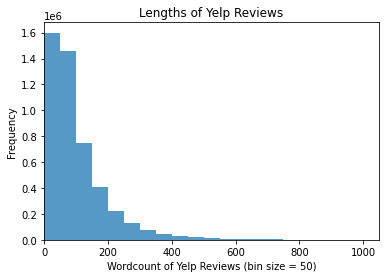

Maximum Review Length: 1,041
Minimum Review Length: 1
Average Review Length: 102
Median Review Length: 
Number of Reviews: 4,779,736


In [24]:
num_reviews = len(lengths)
min_length = np.nanmin(lengths)
max_length = np.nanmax(lengths)
mean_length = np.nanmean(lengths)
med_length = np.nanmedian(lengths)
bins = np.arange(0, 1000, 50)

fig1 = plt.gcf()
plt.xlim([0, 1050])

plt.hist(lengths, bins=bins, alpha=0.75)
plt.title('Lengths of Yelp Reviews')
plt.xlabel('Wordcount of Yelp Reviews (bin size = 50)')
plt.ylabel('Frequency')

plt.show()
fig1.savefig("./pics/review_length.jpg", format='jpg')
print("Maximum Review Length: {:,}".format(int(max_length)))
print("Minimum Review Length: {:,}".format(int(min_length)))
print("Average Review Length: {:,}".format(int(mean_length)))
print("Median Review Length: ".format(int(med_length)))
print("Number of Reviews: {:,}".format(num_reviews))

This histogram shows that, while the minimum length review is a single word, and the maximum length review is more than 1000 words, the large majority of reviews are concentrated under 200 words in length. Let's dive more deeply into those reviews.

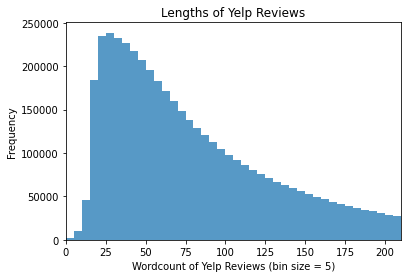

Number of reviews with length less than 200: 4,222,484
Proportion of reviews with length less than 200: 0.883


In [25]:
bins = np.arange(0, 220, 5)

fig2 = plt.gcf()
plt.xlim([0, 210])

plt.hist(lengths, bins=bins, alpha=0.75)
plt.title('Lengths of Yelp Reviews')
plt.xlabel('Wordcount of Yelp Reviews (bin size = 5)')
plt.ylabel('Frequency')

plt.show()
fig2.savefig("./pics/review_length200.jpg", format='jpg')
print("Number of reviews with length less than 200: {:,}".format(np.sum(lengths <= 200)))
print("Proportion of reviews with length less than 200: {:0.3f}".format(np.sum(lengths <= 200) / num_reviews))

Specifically, we see that 88.3% of reviews have length less than 200 words.

### Distribution of stars

We should also examine the distribution of stars given within the corpus of reviews.

In [7]:
review_stars = all_reviews['stars'].to_numpy()
review_stars = review_stars[~np.isnan(review_stars)]
np.save('data/review_stars.npy', review_stars)

In [8]:
review_stars = np.load('data/review_stars.npy')

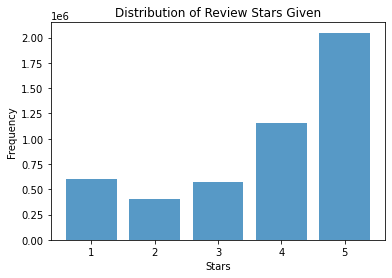

Frequencies:  [599,691 404,069 573,941 1,153,807 2,048,229]
Proportions:  [0.125 0.085 0.12  0.241 0.429]


In [26]:
freqs = np.bincount(review_stars.astype(int))[1:]
fig3 = plt.gcf()
plt.bar([1,2,3,4,5],freqs, alpha=0.75)
plt.title('Distribution of Review Stars Given')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.xticks([1,2,3,4,5], [1,2,3,4,5])
plt.show()
fig3.savefig("./pics/star_distribution.jpg", format='jpg')

np.set_printoptions(formatter={'int_kind': '{:,}'.format})
print("Frequencies: ", freqs)
np.set_printoptions(precision=3)
print("Proportions: ", freqs/len(review_stars))
np.set_printoptions()

As you can see, the distribution of star ratings is not even across the range of stars. The majority of ratings are postiive, either a 4 or a 5. This likely has to do with self-selection bias. People are more likely to leave a review if they felt strongly about a restaurant, and of those people, they are more likely to leave a review if they had a positive experience.

In [17]:
num_pos_stars = (freqs[3] + freqs[4])
print("Proportion of positive stars: {:0.3f}".format(num_pos_stars/sum(freqs)))

Proportion of positive stars: 0.670


For the sake of training our model, this analysis motivates us to design a dataset with an equal distribution of star ratings, so that the model does not train by tending towards one star value. We are also motivated to use reviews whose lengths are within a certain, specific range, so that  range. We will use the range of 20 words to 120 words as our range. We believe that in most cases, a review must be of a sufficient length to give us training information, and to be assessable. We balance this with the desire to create the input size into our model a reasonable size.